___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font></div>

## Perform standard imports and load datasets

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
import datetime
import statsmodels.api as sm
from matplotlib import pyplot
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline
path = 'data_zero.csv'
df=pd.read_csv(path)
columns_names = df.columns
df.index = pd.to_datetime(df[columns_names[0]]/1000, unit='s')
# df.drop(columns[0], axis = 1)
delite_column = columns_names[0]
df = df.drop(delite_column, axis = 1) 
# df.sort_index(inplace= True)
df.sort_index(inplace= True)
# df = df.asfreq(freq='S')
speed =500
dfx =df[::speed]

In [2]:
def taking_of_nan_values_DF(dfx):
    # interpolation
    dfx = dfx.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    dfx = dfx.fillna(method='ffill')
    dfx = dfx.fillna(method='bfill')
    return dfx

In [3]:
dfx = taking_of_nan_values_DF(dfx)
dfx.head()
dfx.tail()

,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
miliseka,,,,,,,,
2013-04-24 08:02:23.569999933,0.007187,0.011875,0.009684,0.013130,0.004375,0.010624,0.000938,0.003125
2013-04-24 08:02:28.569999933,-0.001879,-0.000940,0.016562,0.023441,0.002815,0.007500,0.000000,0.001562
2013-04-24 08:02:33.569999933,0.007498,0.006245,0.017813,0.018440,0.005312,0.011875,0.005625,0.005312
2013-04-24 08:02:38.569999933,0.017185,0.019688,0.015936,0.020628,0.008751,0.016251,0.006563,0.004375
2013-04-24 08:02:43.569999933,-0.001251,-0.000629,0.020937,0.020939,0.002502,0.006876,-0.003437,-0.003437


### Inspect the data, create a DatetimeIndex

We need to combine two integer columns (year and month) into a DatetimeIndex. We can do this by passing a dictionary into <tt>pandas.to_datetime()</tt> with year, month and day values.<br>
For more information visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

# Train and Predict the model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,prediction_time))

In [4]:
def sarima(dfx):
    columns = dfx.columns
    for column in columns:        
        # Set one year for testing
        length = len(dfx[column])
        length_train = int(length * 0.5)
        prediction_time =int(length * 0.5)
        train = dfx[column].iloc[:length_train]
        model = SARIMAX(train,order=(1,1,0),seasonal_order=(1,1,0,prediction_time))
        results = model.fit()
        fcast = results.predict(length_train ,length_train+prediction_time-1, typ='levels').rename('SARIMA Forecast')
        # Plot predictions against known values      
        dfx[column].plot(figsize=(20,6)).autoscale(axis='x',tight=True)
        fcast.plot()
        plt.title('SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,prediction_time)) ' + column, size=10)
        plt.xlabel('time')
        plt.ylabel('Value')
        plt.show()



## Great job!

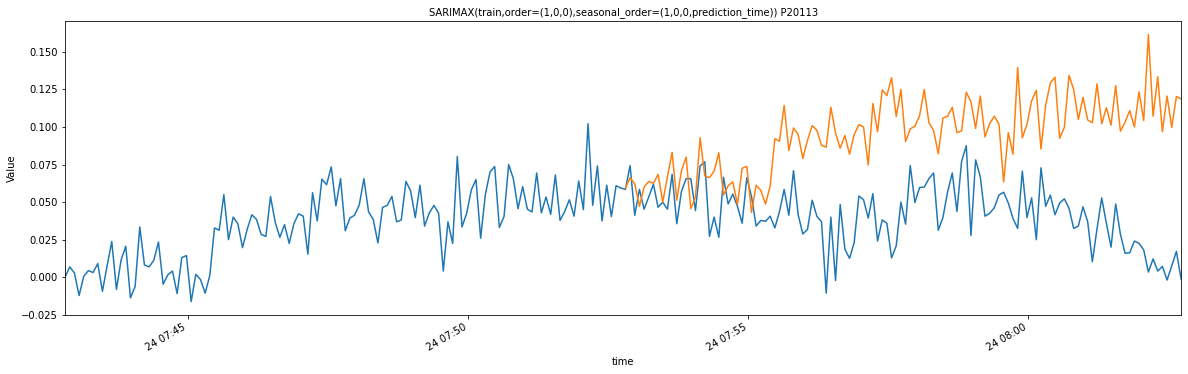

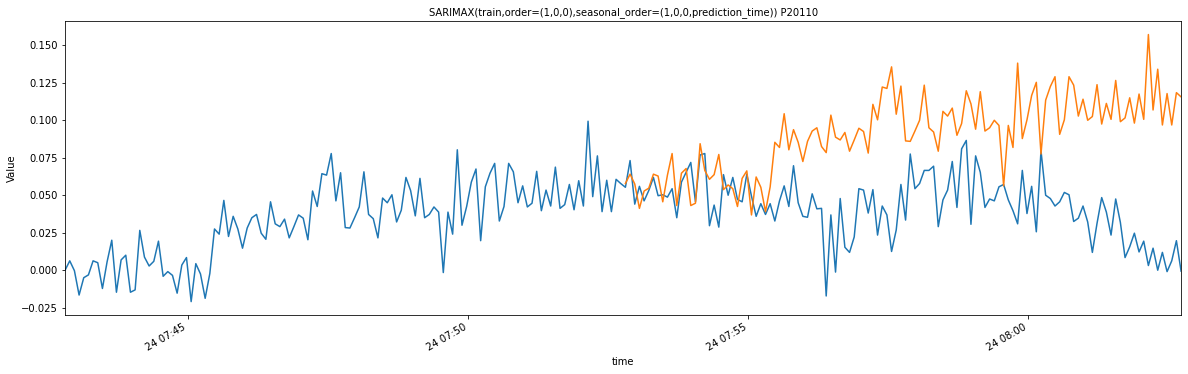

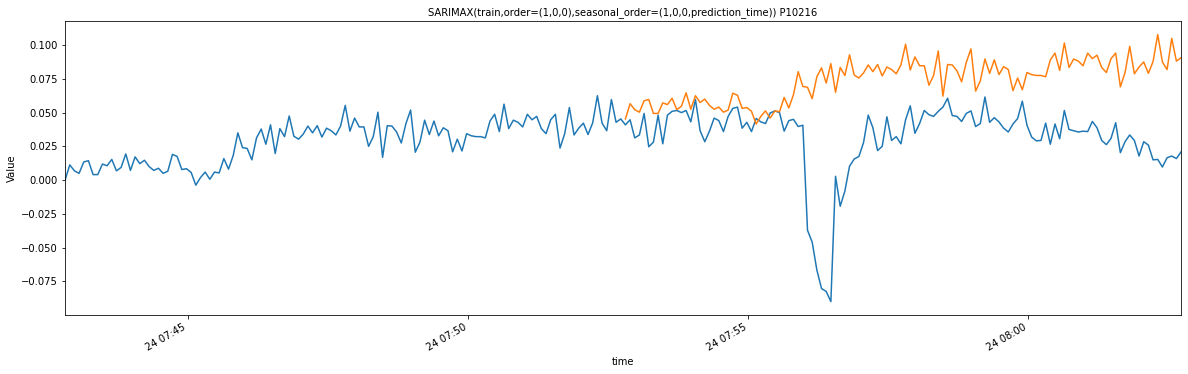

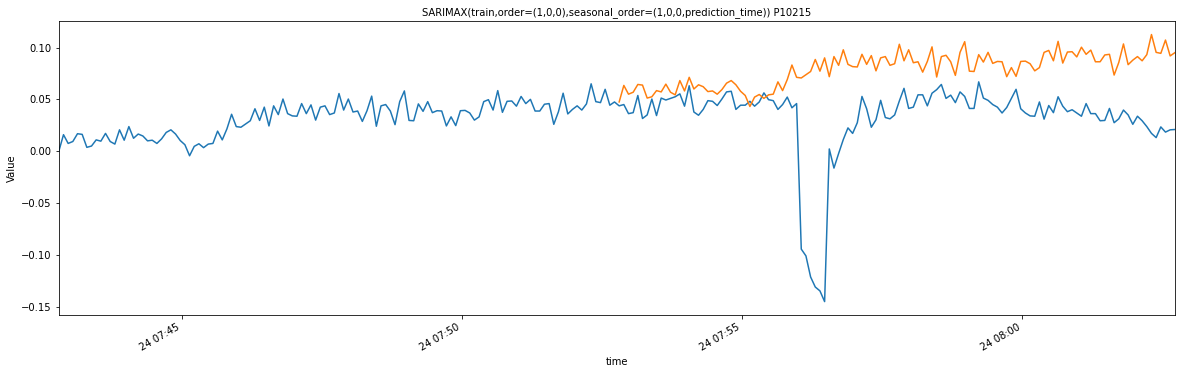

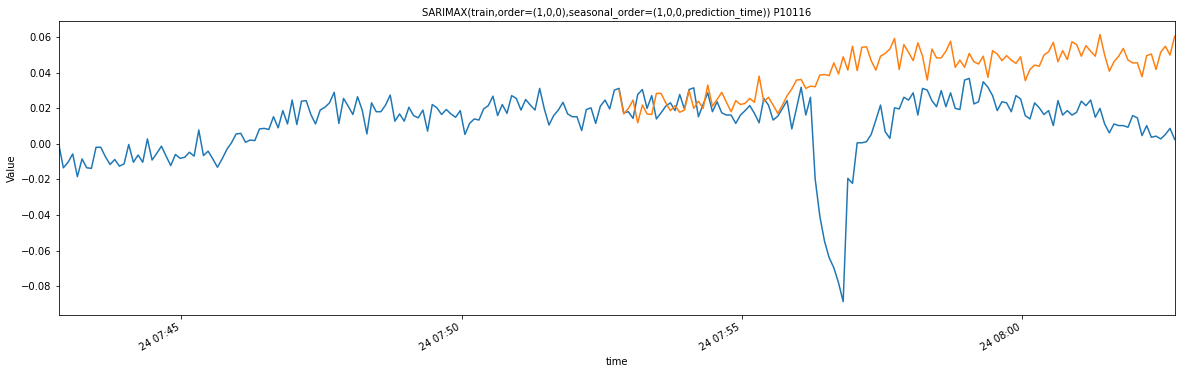

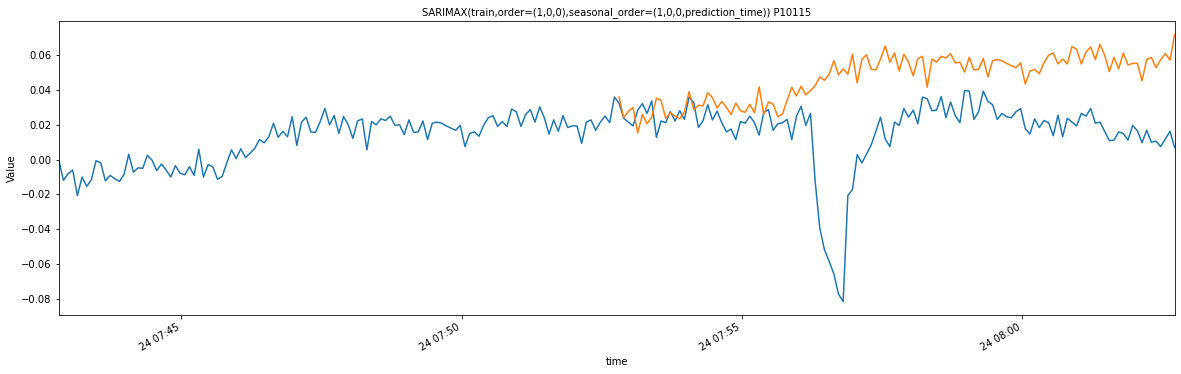

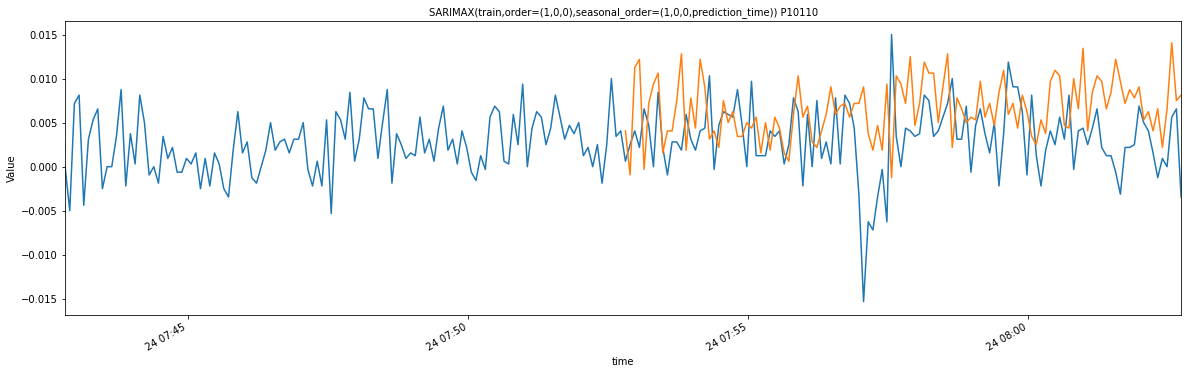

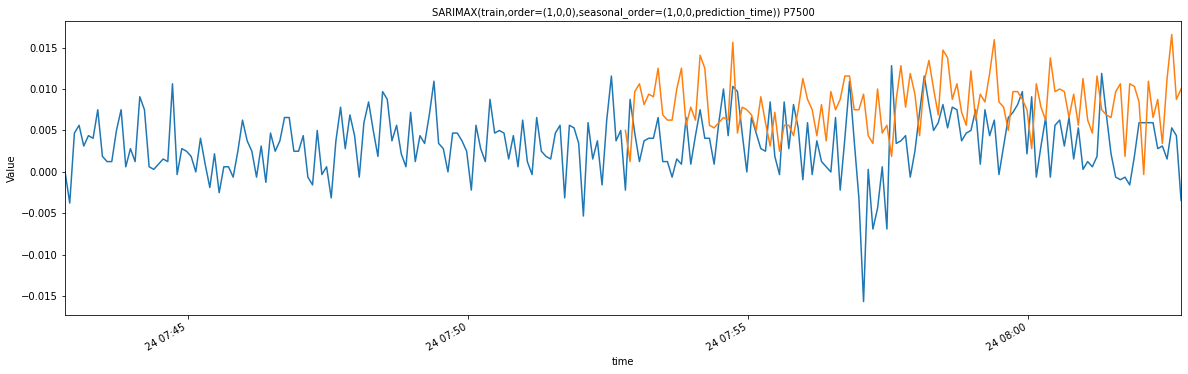

In [5]:
sarima(dfx)